In [899]:
import numpy as np
import pandas as pd
from IPython.display import display
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

In [645]:
weather_solar_daily = pd.DataFrame(pd.read_excel("C:/Users/r.draiwaish.c/Documents/T5 SDAIA/Solar/weather-dataset_hourly-to-daily.xlsx",sheet_name="daily"))

weather_input_hourly =  pd.DataFrame(pd.read_excel("C:/Users/r.draiwaish.c/Documents/T5 SDAIA/Solar/weather-dataset_hourly-to-daily.xlsx",sheet_name="inputs"))

solar_output_hourly =  pd.DataFrame(pd.read_csv("C:/Users/r.draiwaish.c/Documents/T5 SDAIA/Solar/solar-output_hourly.csv"))


In [646]:
#get information and data for each DataFrame
dfs = [weather_solar_daily, weather_input_hourly,solar_output_hourly]
for i in dfs:
    i.info()
    print('\n'+'\n')
    print(i)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               637 non-null    datetime64[ns]
 1   Cloud coverage     637 non-null    float64       
 2   Visibility         637 non-null    float64       
 3   Temperature        637 non-null    float64       
 4   Dew point          637 non-null    float64       
 5   Relative humidity  637 non-null    float64       
 6   Wind speed         637 non-null    float64       
 7   Station pressure   637 non-null    float64       
 8   Altimeter          637 non-null    float64       
 9   Solar energy       637 non-null    int64         
 10  (Inverters)        0 non-null      float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 54.9 KB



          Date  Cloud coverage  Visibility  Temperature  Dew point  \
0   2016-02-01        0.103750    9.4

In [647]:
solar_output_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             15072 non-null  int64  
 1   Day               15072 non-null  int64  
 2   Year              15072 non-null  int64  
 3   Hr                15072 non-null  int64  
 4   Inverter_hr_mean  15072 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 588.9 KB


In [648]:
#print unique value for each column
for col in solar_output_hourly:
    print(col)
    print(solar_output_hourly[col].unique())

Month
[ 1 10 11 12  2  3  4  5  6  7  8  9]
Day
[ 1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23 24 25 26 27 28 29  3 30
 31  4  5  6  7  8  9]
Year
[17 16]
Hr
[ 0  1 10 11 12 13 14 15 16 17 18 19  2 20 21 22 23  3  4  5  6  7  8  9]
Inverter_hr_mean
[   0.      3208.75    3840.25    ...   35.27075  587.25    3037.5    ]


In [649]:
# Take the date and time fields into a single datetime column
df = solar_output_hourly[['Year', 'Month', 'Day', 'Hr']].astype(str)
date_hour = df['Year'] + '/' + df['Month'] + '/' + df['Day'] + ' ' + df['Hr']

solar_output_hourly['DateTime'] = pd.to_datetime(date_hour, format='%y/%m/%d %H')


In [650]:
#sort the dataframe based on DateTime
solar_output_hourly['DateTime'].value_counts().sort_index()

2016-02-01 00:00:00    1
2016-02-01 01:00:00    1
2016-02-01 02:00:00    1
2016-02-01 03:00:00    1
2016-02-01 04:00:00    1
                      ..
2017-10-28 19:00:00    1
2017-10-28 20:00:00    1
2017-10-28 21:00:00    1
2017-10-28 22:00:00    1
2017-10-28 23:00:00    1
Name: DateTime, Length: 15072, dtype: int64

In [651]:
solar_output_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15072 entries, 0 to 15071
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Month             15072 non-null  int64         
 1   Day               15072 non-null  int64         
 2   Year              15072 non-null  int64         
 3   Hr                15072 non-null  int64         
 4   Inverter_hr_mean  15072 non-null  float64       
 5   DateTime          15072 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 706.6 KB


In [823]:
solar_output_hourly.head()

,Month,Day,Year,Hr,Inverter_hr_mean,DateTime
0,1,1,17,0,0.00,2017-01-01 00:00:00
1,1,1,17,1,0.00,2017-01-01 01:00:00
2,1,1,17,10,3208.75,2017-01-01 10:00:00
3,1,1,17,11,3840.25,2017-01-01 11:00:00
4,1,1,17,12,3761.00,2017-01-01 12:00:00


In [653]:
weather_input_hourly['Time']=weather_input_hourly['Time'].apply(lambda x:x-1)

In [654]:
weather_input_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               17520 non-null  datetime64[ns]
 1   Time               17520 non-null  int64         
 2   Cloud coverage     17520 non-null  float64       
 3   Visibility         17520 non-null  float64       
 4   Temperature        17520 non-null  float64       
 5   Dew point          17520 non-null  float64       
 6   Relative humidity  17520 non-null  float64       
 7   Wind speed         17520 non-null  float64       
 8   Station pressure   17520 non-null  float64       
 9   Altimeter          17520 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [655]:
# Take the date and time fields into a single datetime column
#inputdate="2015-01-01 1"
#out2 = pd.to_datetime(inputdate, format='%Y-%m-%d  %H')
#print(out2)
#time = datetime.strptime(str(date_time), '%Y-%m-%d %H:%M:%S,%f')

In [656]:
df2 = weather_input_hourly[['Date', 'Time']].astype(str)
date_hour2 = df2['Date'] + ' ' + df2['Time']
weather_input_hourly['DateTime'] = pd.to_datetime(date_hour2, format='%Y-%m-%d  %H')

In [822]:
weather_input_hourly.head()

,Date,Time,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,DateTime
0,2015-11-01,0,0.42,10.00,9.94,9.28,88.88,7.57,29.07,29.86,2015-11-01 00:00:00
1,2015-11-01,1,0.00,10.00,8.29,8.45,93.96,6.76,29.07,29.86,2015-11-01 01:00:00
2,2015-11-01,2,0.00,9.92,7.95,8.19,95.88,8.36,29.08,29.87,2015-11-01 02:00:00
3,2015-11-01,3,0.00,9.92,7.22,7.85,95.88,7.12,29.09,29.88,2015-11-01 03:00:00
4,2015-11-01,4,0.00,9.84,6.44,7.72,96.00,5.48,29.10,29.89,2015-11-01 04:00:00


In [824]:
df_weather_solar=pd.merge(weather_input_hourly, solar_output_hourly, on='DateTime')
#df_weather_solar_q=pd.merge(weather_input_hourly, solar_output_hourly, on='DateTime')
#df_weather_solar.drop(['Month','Day','Year','Hr'], axis='columns', inplace=True)
#df_weather_solar.drop(['Date', 'Time'], axis='columns', inplace=True)

In [825]:
df_weather_solar.sort_values(by=['DateTime'],inplace=True)
#df_weather_solar_q.sort_values(by=['DateTime'],inplace=True)

In [826]:
df_weather_solar.describe()

,Time,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Month,Day,Year,Hr,Inverter_hr_mean
count,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000,15072.000000
mean,11.500000,0.381342,9.157069,14.378246,9.763680,72.255387,8.623920,28.582101,30.020573,6.221338,15.557325,16.479299,11.500000,910.455749
std,6.922416,0.424040,2.051137,10.147761,9.542499,20.032134,5.544336,3.520717,0.216552,3.062155,8.769168,0.499588,6.922416,1375.115758
min,0.000000,0.000000,0.000000,-19.230000,-20.780000,14.880000,0.000000,7.670000,21.880000,1.000000,1.000000,16.000000,0.000000,0.000000
25%,5.750000,0.000000,9.960000,6.957500,3.080000,59.880000,5.040000,29.100000,29.910000,4.000000,8.000000,16.000000,5.750000,0.000000
50%,11.500000,0.140000,10.000000,15.840000,11.000000,76.695000,7.720000,29.220000,30.030000,6.000000,15.000000,16.000000,11.500000,35.483750
75%,17.250000,0.910000,10.000000,22.320000,17.410000,88.622500,11.760000,29.330000,30.130000,9.000000,23.000000,17.000000,17.250000,1467.312500
max,23.000000,1.000000,10.000000,34.010000,27.310000,100.000000,41.560000,29.970000,30.780000,12.000000,31.000000,17.000000,23.000000,4733.250000


In [827]:
df_weather_solar.isnull().sum()

Date                 0
Time                 0
Cloud coverage       0
Visibility           0
Temperature          0
Dew point            0
Relative humidity    0
Wind speed           0
Station pressure     0
Altimeter            0
DateTime             0
Month                0
Day                  0
Year                 0
Hr                   0
Inverter_hr_mean     0
dtype: int64

In [828]:
df_weather_solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15072 entries, 0 to 15071
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               15072 non-null  datetime64[ns]
 1   Time               15072 non-null  int64         
 2   Cloud coverage     15072 non-null  float64       
 3   Visibility         15072 non-null  float64       
 4   Temperature        15072 non-null  float64       
 5   Dew point          15072 non-null  float64       
 6   Relative humidity  15072 non-null  float64       
 7   Wind speed         15072 non-null  float64       
 8   Station pressure   15072 non-null  float64       
 9   Altimeter          15072 non-null  float64       
 10  DateTime           15072 non-null  datetime64[ns]
 11  Month              15072 non-null  int64         
 12  Day                15072 non-null  int64         
 13  Year               15072 non-null  int64         
 14  Hr    

In [829]:
Inverter_hourly = df_weather_solar.groupby(['Hr'])[['Inverter_hr_mean']].sum().reset_index()
Inverter_hourly.head()

,Hr,Inverter_hr_mean
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [830]:
%matplotlib inline

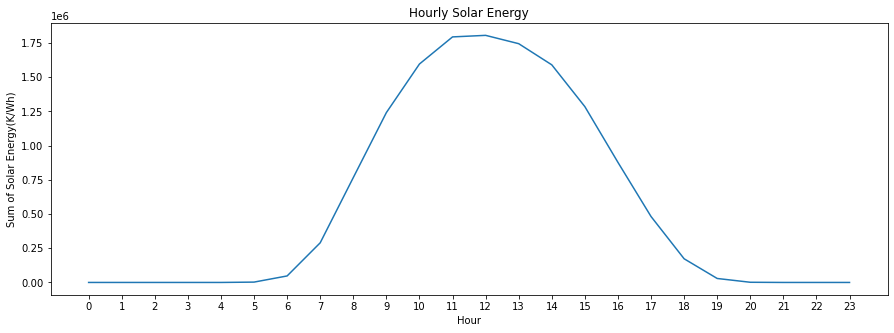

In [831]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(Inverter_hourly['Hr'], Inverter_hourly['Inverter_hr_mean'])
ax.set_ylabel('Sum of Solar Energy(K/Wh)')
ax.set_xlabel('Hour')
plt.xticks(Inverter_hourly['Hr'])
#ax.xaxis.set_tick_params(rotation=45)
ax.set_title('Hourly Solar Energy')
plt.show(fig)
#We can see that starting from 6am  until 5pm to get solar energy So, this is a big hint that we have to deal with Daily basis for prediction 

In [844]:
weather_solar_daily.head()

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy,(Inverters)
0,2016-02-01,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583,20256,NaN
1,2016-02-02,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917,1761,NaN
2,2016-02-03,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583,2775,NaN
3,2016-02-04,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583,28695,NaN
4,2016-02-05,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250,9517,NaN
...,...,...,...,...,...,...,...,...,...,...,...
632,2017-10-25,0.226667,10.000000,5.873333,2.892917,82.331250,5.555000,29.037917,29.827917,13737,NaN
633,2017-10-26,0.011667,10.000000,10.588750,5.315000,72.742917,9.606250,28.966667,29.756667,27465,NaN
634,2017-10-27,0.893333,10.000000,5.793333,0.041250,67.364583,13.622917,29.080417,29.870417,15797,NaN
635,2017-10-28,0.992917,9.667500,3.431250,-0.111667,77.866250,9.671250,29.145833,29.937083,6400,NaN


In [854]:
weather_solar_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               637 non-null    datetime64[ns]
 1   Cloud coverage     637 non-null    float64       
 2   Visibility         637 non-null    float64       
 3   Temperature        637 non-null    float64       
 4   Dew point          637 non-null    float64       
 5   Relative humidity  637 non-null    float64       
 6   Wind speed         637 non-null    float64       
 7   Station pressure   637 non-null    float64       
 8   Altimeter          637 non-null    float64       
 9   Solar energy       637 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 49.9 KB


In [879]:
weather_solar_daily.describe()

,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000
mean,0.382653,9.137993,14.202875,9.623165,72.416289,8.631052,28.592114,30.022427,21521.733124
std,0.313158,1.416147,9.484466,9.334165,13.711698,4.082785,2.683676,0.187620,10843.988912
min,0.000000,1.153750,-16.062917,-18.715417,21.253750,1.031250,8.593750,29.475417,580.000000
25%,0.118333,8.842083,7.361250,3.217083,65.307083,5.667083,29.055000,29.910833,12268.000000
50%,0.314583,9.853333,16.260833,10.795833,73.689583,8.168750,29.201667,30.024583,23094.000000
75%,0.618333,10.000000,22.339167,17.329167,82.331250,10.910000,29.313333,30.134167,30307.000000
max,1.000000,10.000000,28.177500,25.019583,97.845000,24.824583,29.864583,30.671250,40245.000000


In [845]:
weather_solar_daily['(Inverters)'].isnull().sum()

637

In [846]:
#drop Inverters columns since it is all null and have the same meaning of Solar Energy
weather_solar_daily.drop(['(Inverters)'], axis='columns', inplace=True)

In [847]:
weather_solar_daily.head()

,Date,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter,Solar energy
0,2016-02-01,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583,20256
1,2016-02-02,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917,1761
2,2016-02-03,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583,2775
3,2016-02-04,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583,28695
4,2016-02-05,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250,9517


In [849]:
%matplotlib inline

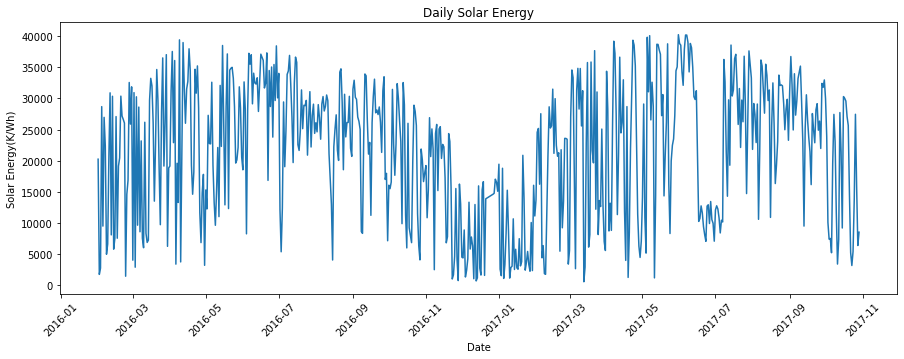

In [850]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(weather_solar_daily['Date'], weather_solar_daily['Solar energy'])
ax.set_ylabel('Solar Energy(K/Wh)')
ax.set_xlabel('Date')
ax.xaxis.set_tick_params(rotation=45)
ax.set_title('Daily Solar Energy')
plt.show(fig)

In [754]:
%matplotlib inline

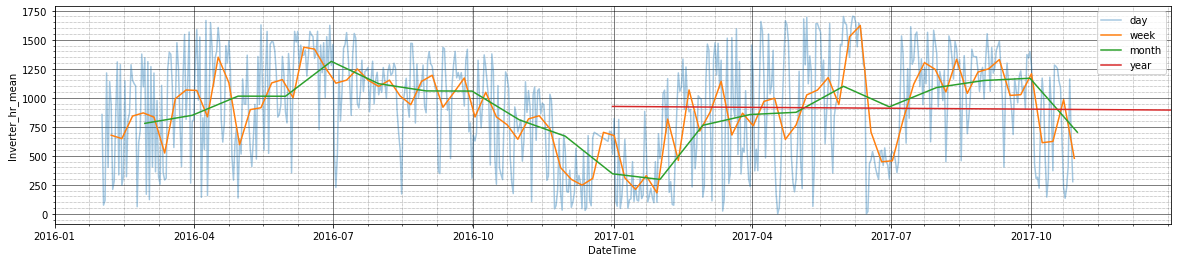

In [851]:
f, ax = plt.subplots(figsize=(20, 4))
data_resample_y = df_weather_solar.resample(rule='Y', on='DateTime').mean()
data_resample_m = df_weather_solar.resample(rule='M', on='DateTime').mean()
data_resample_w = df_weather_solar.resample(rule='W', on='DateTime').mean()
data_resample_d = df_weather_solar.resample(rule='D', on='DateTime').mean()
sns.lineplot(data=data_resample_d, x="DateTime", y="Inverter_hr_mean", label="day", alpha  = 0.4)
sns.lineplot(data=data_resample_w, x="DateTime", y="Inverter_hr_mean", label="week")
sns.lineplot(data=data_resample_m, x="DateTime", y="Inverter_hr_mean", label="month")
sns.lineplot(data=data_resample_y, x="DateTime", y="Inverter_hr_mean", label="year")
ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,1,1), datetime(2017,12,31)]);

<AxesSubplot:>

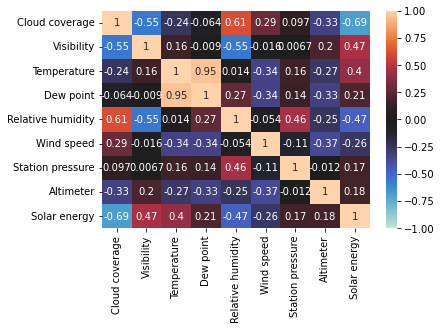

In [852]:
cor=weather_solar_daily.corr()
sns.heatmap(cor,cmap="icefire", annot=True, vmin=-1, vmax=1)

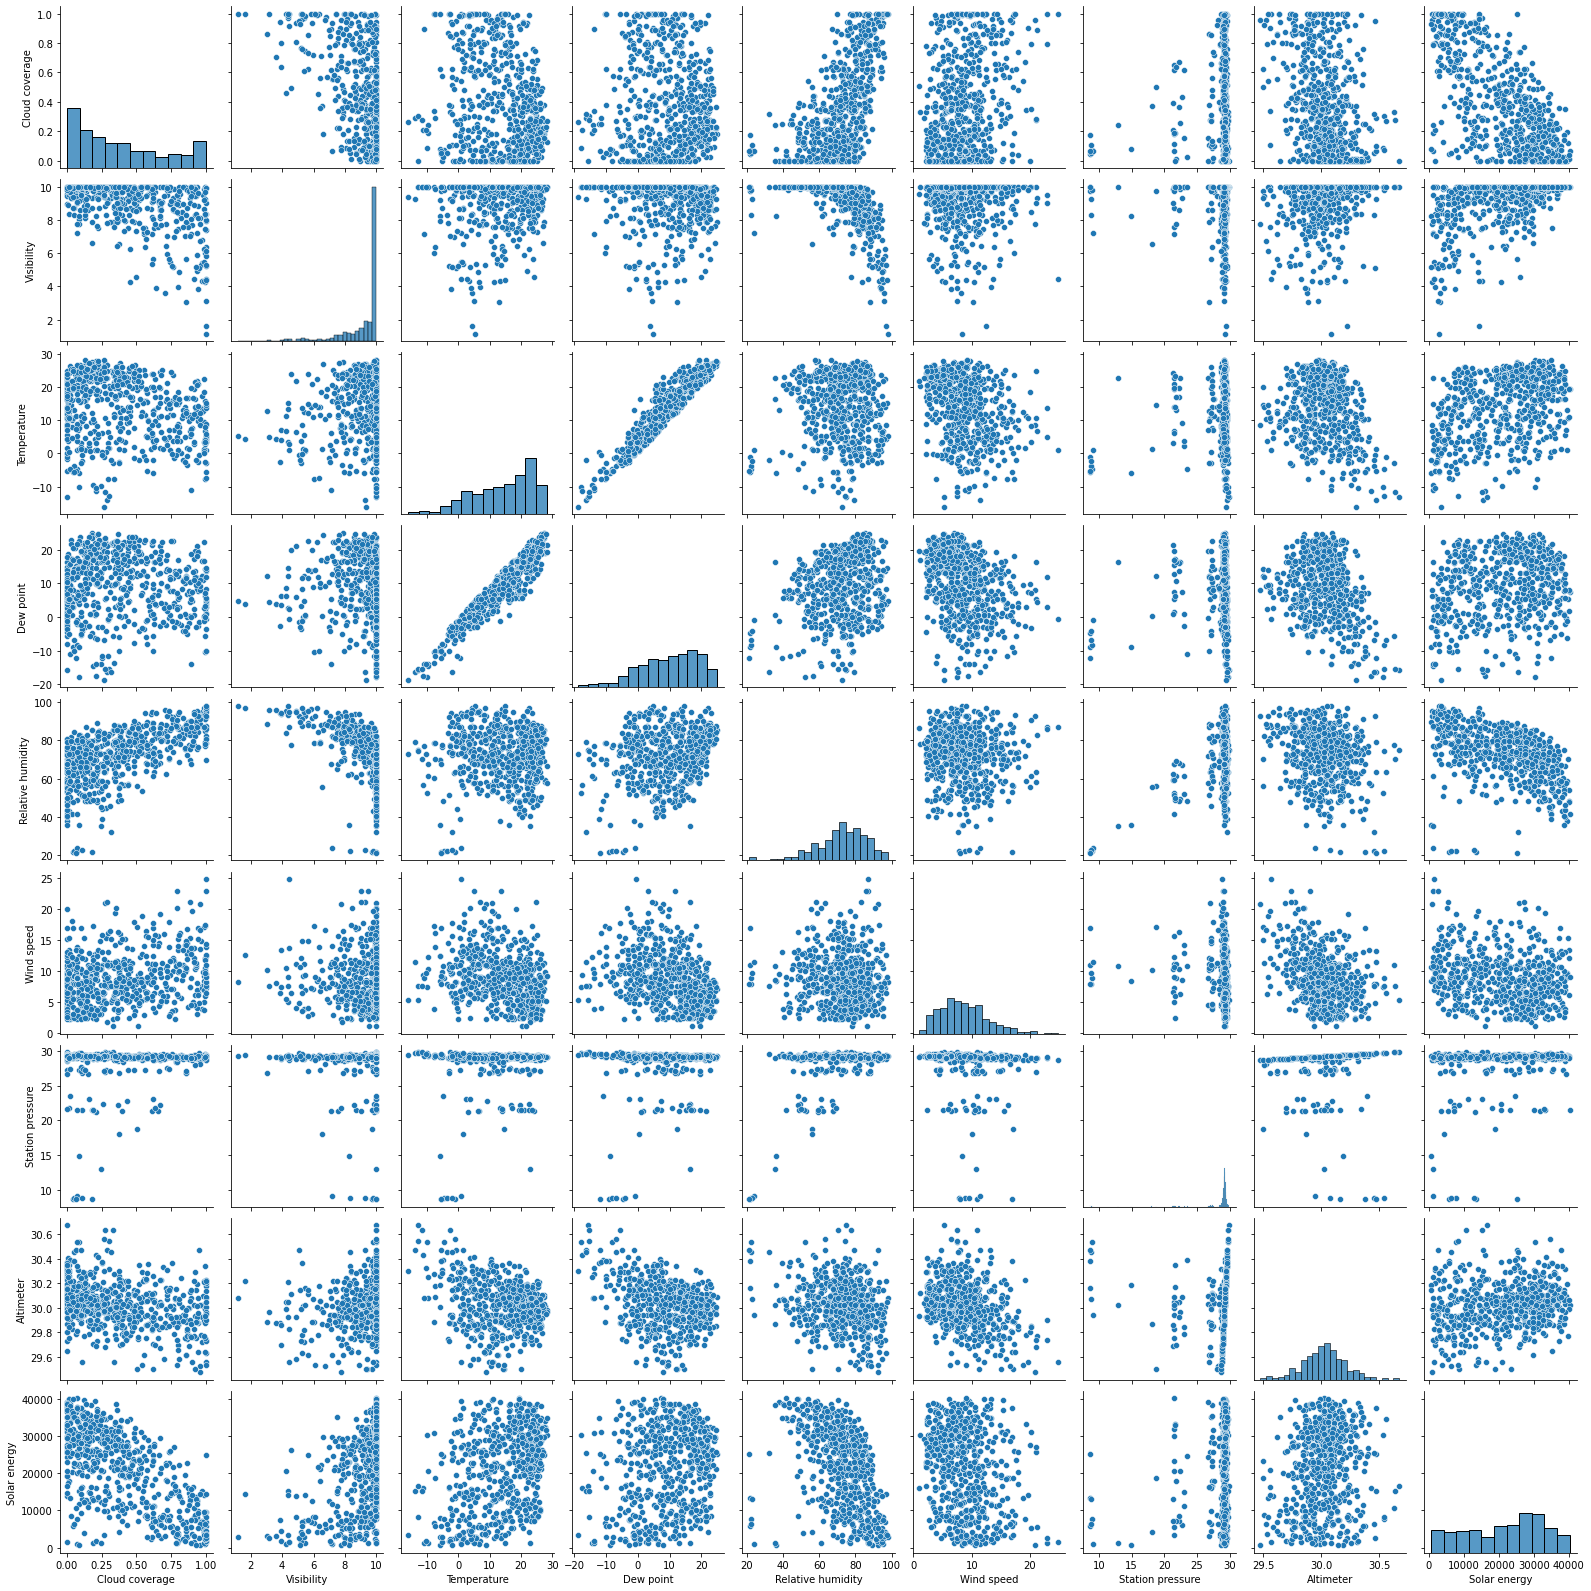

In [853]:
sns.pairplot(weather_solar_daily);

In [870]:
#Correlation with output variable
cor_target = abs(cor["Solar energy"])
#Selecting "highly" correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Cloud coverage    0.687789
Solar energy      1.000000
Name: Solar energy, dtype: float64

In [869]:
#Correlation with output variable
cor_target = cor["Solar energy"]
#Selecting correlated features positive with target Solar energy
prelevant_features = cor_target[cor_target>0]
prelevant_features

Visibility          0.468649
Temperature         0.399978
Dew point           0.207744
Station pressure    0.169704
Altimeter           0.178648
Solar energy        1.000000
Name: Solar energy, dtype: float64

In [868]:
#Correlation with output variable
cor_target = cor["Solar energy"]
#Selecting correlated features Negative with target Solar energy
nrelevant_features = cor_target[cor_target<0]
nrelevant_features

Cloud coverage      -0.687789
Relative humidity   -0.472123
Wind speed          -0.259569
Name: Solar energy, dtype: float64

In [ ]:
# Temperature and Dew point has a hight positive correlation with 0.95 Then We can drop one of theme
#Since Temperature(0.4) has a higher positive correlation with target that Dew point(0.21) by 0.19 difference
#So Lets try and drop Dew point 
#weather_solar_daily.drop(['Dew point'], axis='columns', inplace=True)


# Visibility and Cloud coverage has almost negative correlation by -0.55
# Visibility and Relative humidity has almost negative correlation by -0.55
# Relative humidity and Cloud coverage has almost positive correlation by 0.61


In [ ]:
# The hightest positve correlation with the Target "Solar Energy" is Visibility by 0.468649
# The hightest negative correlation with the Target "Solar Energy" is Cloud coverage by -0.687789

In [893]:
# slice data into features and target
X = weather_solar_daily.iloc[:, 0:9]
X.drop(['Date'], axis='columns', inplace=True)
X

,Cloud coverage,Visibility,Temperature,Dew point,Relative humidity,Wind speed,Station pressure,Altimeter
0,0.103750,9.447917,3.113750,0.321667,79.454583,4.694583,29.228750,30.019583
1,0.798333,3.941250,6.992500,6.215417,93.597500,13.290833,28.911667,29.697917
2,0.864583,8.699583,1.615000,0.022917,85.001667,16.726250,29.026667,29.814583
3,0.372917,10.000000,-2.472500,-5.886250,74.522500,9.455417,29.455000,30.254583
4,0.515417,9.206667,-2.002917,-4.152083,82.027500,5.920000,29.550833,30.351250
...,...,...,...,...,...,...,...,...
632,0.226667,10.000000,5.873333,2.892917,82.331250,5.555000,29.037917,29.827917
633,0.011667,10.000000,10.588750,5.315000,72.742917,9.606250,28.966667,29.756667
634,0.893333,10.000000,5.793333,0.041250,67.364583,13.622917,29.080417,29.870417
635,0.992917,9.667500,3.431250,-0.111667,77.866250,9.671250,29.145833,29.937083


In [894]:
# slice data into features and target
y = weather_solar_daily.iloc[:, 9:10]
y


,Solar energy
0,20256
1,1761
2,2775
3,28695
4,9517
...,...
632,13737
633,27465
634,15797
635,6400


In [895]:
# hold out 20% of the data for final testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [896]:
np.mean(y_train)

Solar energy    21774.316306
dtype: float64

In [897]:
#I will see the predection by using linear regression or KNN

In [881]:
# Fit a linear regression model on the train data set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [882]:
# Check the R-squared value of the model on the training data
lr.score(X_train, y_train)

0.6566410979247712

In [883]:
# Check the R-squared value of the model on the test data
lr.score(X_test, y_test)

0.49721906300387475

In [884]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [885]:
# Compare the actual y values in the training set with the predicted values
y_actual_train = y_train
y_predicted_train = lr.predict(X_train)
y_predicted_train.shape

(509, 1)

In [886]:
# Check the RMSE (root mean squared error) on the training data
sqrt(mean_squared_error(y_actual_train, y_predicted_train))

6392.413775152783

In [887]:
# Compare the actual y values in the test set with the predicted values
y_actual_test = y_test
y_predicted_test = lr.predict(X_test)
y_predicted_test.shape

(128, 1)

In [888]:
# Check the RMSE (root mean squared error) on the test data
sqrt(mean_squared_error(y_actual_test, y_predicted_test))

7429.1729386787165

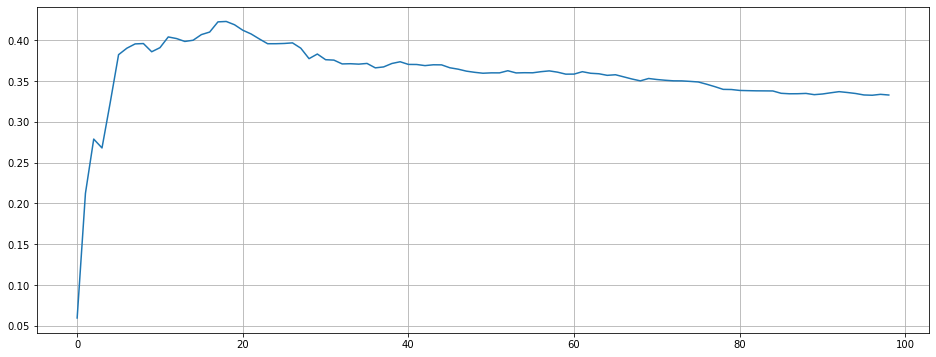

In [892]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=10)
score_valeus=[]
for i in range(1,100):
    model = KNeighborsRegressor(n_neighbors= i)
    model.fit(X_train,y_train)
    score = model.score(X_test,y_test)
    score_valeus.append(score)
score_valeus
ax = np.arange(len(score_valeus))
plt.figure(figsize=(16,6))
plt.grid()
plt.plot(ax,score_valeus)
#the best number of neighbors is 18 neighbors with accurency of 43% as we can see the model is not very good at this moment